In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('IMC Prosperity Results.csv', delimiter=';')

# Load the old CSV file
df_old = pd.read_csv('IMC Prosperity Results_old.csv', delimiter=';')


# Display the first few rows of the DataFrame
df.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,RAINFOREST_RESIN,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
1,-1,0,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,31,NaN,NaN,NaN,NaN,2028.5,0.0
2,-1,100,KELP,2025,24,NaN,NaN,NaN,NaN,2028,2,2029.0,22.0,NaN,NaN,2026.5,0.0
3,-1,100,RAINFOREST_RESIN,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,5.0
4,-1,200,RAINFOREST_RESIN,9995,20,NaN,NaN,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10000.0,5.0


In [18]:
df_old.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
1,-2,0,STARFRUIT,5002,1,4997.0,31.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5002.5,0.0
2,-2,100,AMETHYSTS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,0.0
3,-2,100,STARFRUIT,4997,24,NaN,NaN,NaN,NaN,5003,2,5004.0,22.0,NaN,NaN,5000.0,0.0
4,-2,200,STARFRUIT,4997,2,4996.0,20.0,NaN,NaN,5003,20,NaN,NaN,NaN,NaN,5000.0,0.0


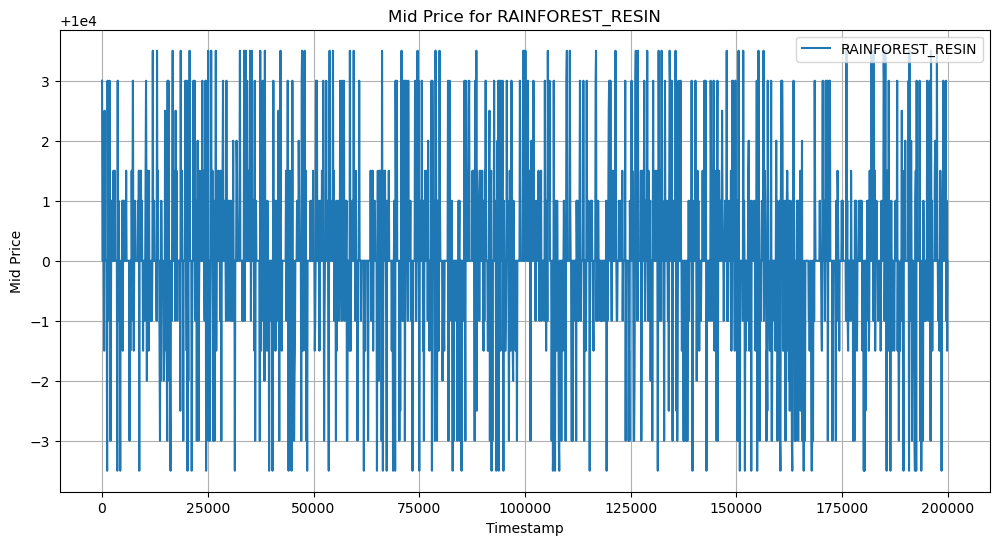

In [5]:
import matplotlib.pyplot as plt

# Filter the DataFrame for each product
df_resin = df[df['product'] == 'RAINFOREST_RESIN']
df_kelp = df[df['product'] == 'KELP']

import matplotlib.pyplot as plt

# Plot for RAINFOREST_RESIN
plt.figure(figsize=(12, 6))
plt.plot(df_resin['timestamp'], df_resin['mid_price'], label='RAINFOREST_RESIN')
plt.xlabel('Timestamp')
plt.ylabel('Mid Price')
plt.title('Mid Price for RAINFOREST_RESIN')
plt.legend()
plt.grid(True)
plt.show()



In [4]:
df_meth = df_old[df_old['product'] == 'AMETHYSTS']

# Plot for Meth
plt.figure(figsize=(12, 6))
plt.plot(df_meth['timestamp'], df_meth['mid_price'], label='Meth')
plt.xlabel('Timestamp')
plt.ylabel('Mid Price')
plt.title('Mid Price for Meth')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

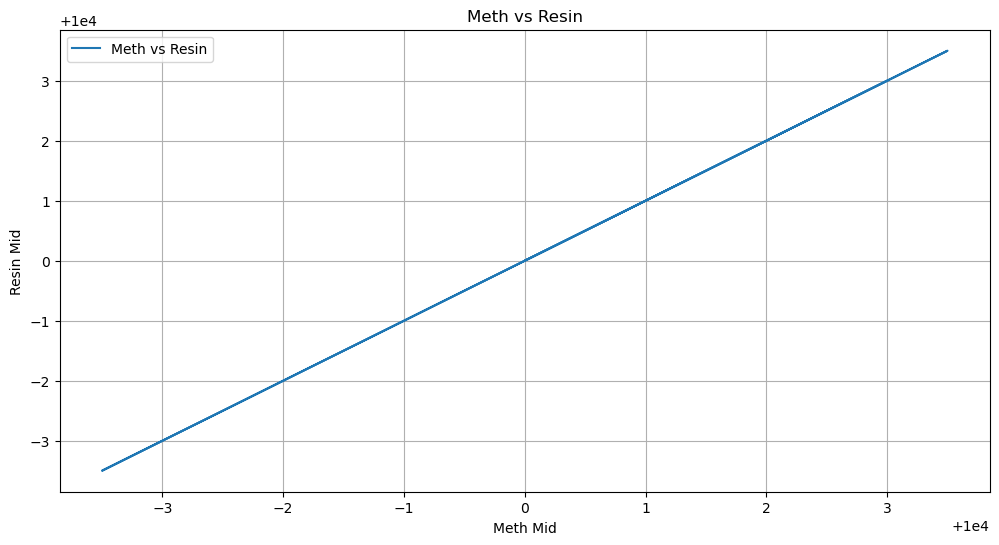

In [26]:
# Plot for Meth and RAINFOREST_RESIN

plt.figure(figsize=(12, 6))
plt.plot(df_meth['mid_price'], df_resin['mid_price'], label='Meth vs Resin')
plt.xlabel('Meth Mid')
plt.ylabel('Resin Mid')
plt.title('Meth vs Resin')
plt.legend()
plt.grid(True)
plt.show()

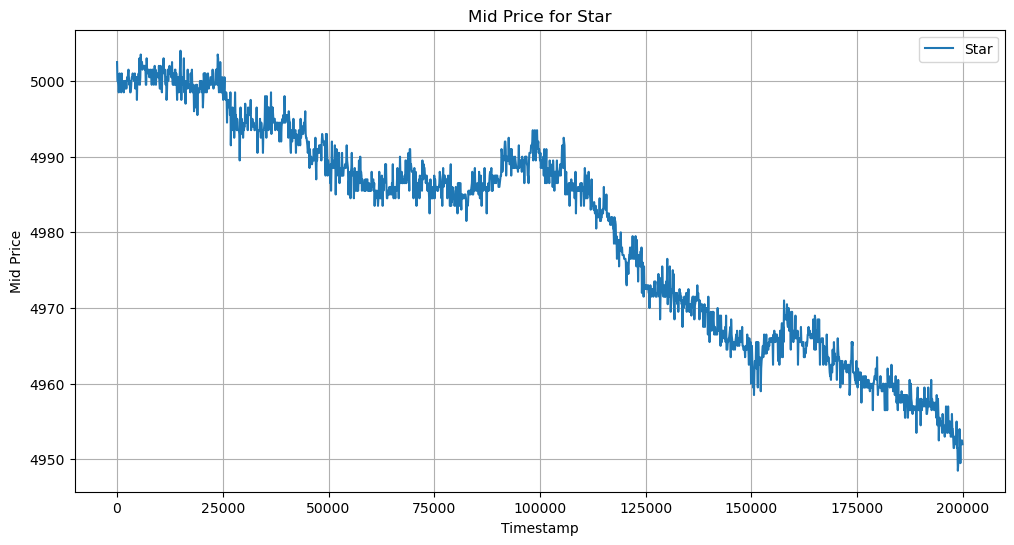

In [6]:
df_star = df_old[df_old['product'] == 'STARFRUIT']

# Plot for Star
plt.figure(figsize=(12, 6))
plt.plot(df_star['timestamp'], df_star['mid_price'], label='Star')
plt.xlabel('Timestamp')
plt.ylabel('Mid Price')
plt.title('Mid Price for Star')
plt.legend()
plt.grid(True)
plt.show()

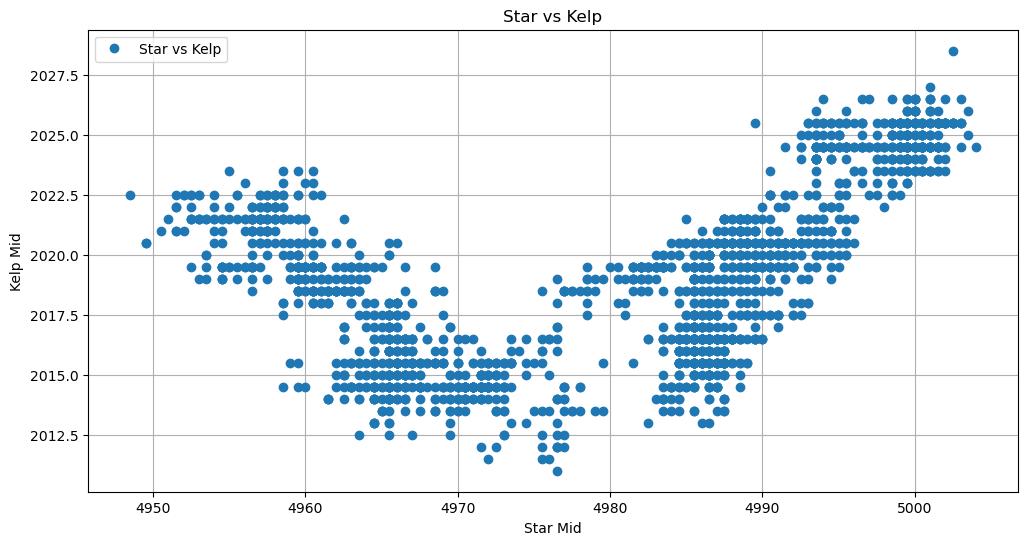

In [ ]:
# Plot for Star and Kelp

plt.figure(figsize=(12, 6))
plt.plot(df_star['mid_price'], df_kelp['mid_price'], label='Star vs Kelp',marker='o',linestyle='none')
plt.xlabel('Star Mid')
plt.ylabel('Kelp Mid')
plt.title('Star vs Kelp')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
df_star = df_star.copy()
df_star['returns'] = df_kelp['mid_price'].shift(1)-df_kelp['mid_price']

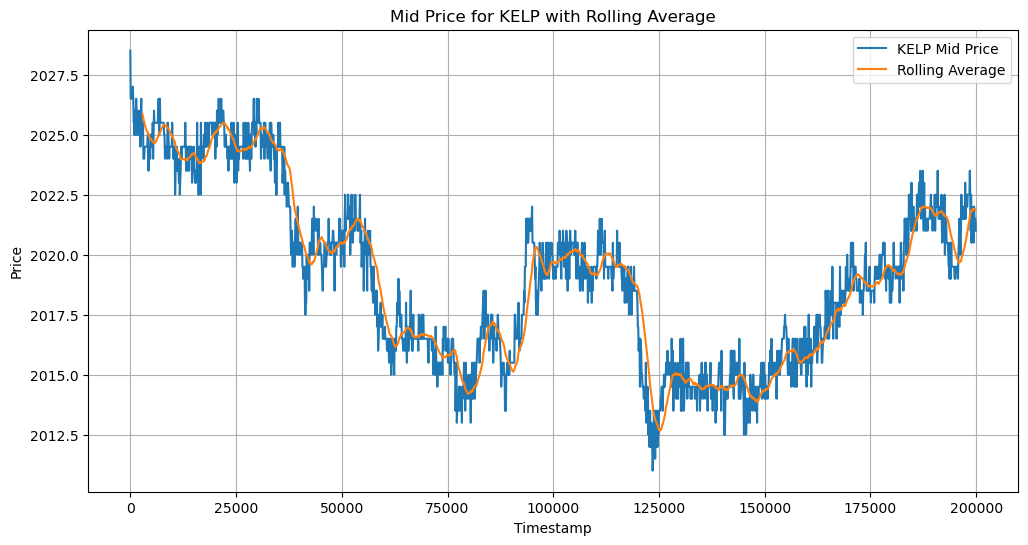

In [14]:
# Calculate the rolling average (change window size as needed)
df_kelp['rolling_mid_price'] = df_star['mid_price'].rolling(window=30).mean()

# Plot the original mid price and the rolling average
plt.figure(figsize=(12, 6))
plt.plot(df_star['timestamp'], df_kelp['mid_price'], label='KELP Mid Price')
plt.plot(df_kelp['timestamp'], df_kelp['rolling_mid_price'], label='Rolling Average', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Mid Price for KELP with Rolling Average')
plt.legend()
plt.grid(True)
plt.show()

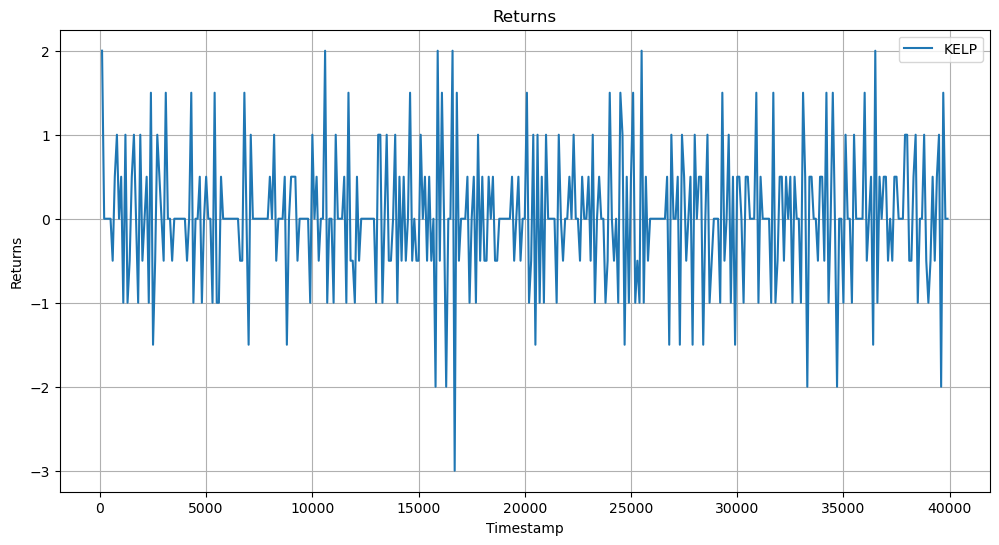

In [15]:
time = 400
plt.figure(figsize=(12, 6))
plt.plot(df_kelp['timestamp'][:time], df_kelp['returns'][:time], label='KELP')
plt.xlabel('Timestamp')
plt.ylabel('Returns')
plt.title('Returns')
plt.legend()
plt.grid(True)
plt.show()

Check what are the limits on the amount we can hold

In [16]:
import json

filename = "Submission Logs 7584b3a5.log"
json_str = ""
found = False

with open(filename, "r") as f:
    # Read lines until we find the marker "Trade History:"
    for line in f:
        if "Trade History:" in line:
            # If the same line contains the opening bracket, use it
            if "[" in line:
                json_str = line[line.find("["):]
            else:
                # Otherwise, assume the next line starts the JSON array
                json_str = next(f)
            found = True
            break

    if not found:
        raise ValueError("Could not find 'Trade History:' with '[' in file.")

    # Append the remainder of the file to the JSON string
    json_str += f.read()

# Parse the JSON string into a list of trade objects
data = json.loads(json_str)

# Calculate the total quantity and total money paid for buyer "SUBMISSION"
total_quantity = 0
total_paid = 0
for item in data:
    if item.get("buyer") == "SUBMISSION":
        quantity = item.get("quantity", 0)
        price = item.get("price", 0)
        total_quantity += quantity
        total_paid += price * quantity

print("Total quantity for buyer 'SUBMISSION':", total_quantity)
print("Total amount paid for buyer 'SUBMISSION':", total_paid)
print("Total revenue for buyer 'SUBMISSION':", total_quantity * 10000- total_paid )

Total quantity for buyer 'SUBMISSION': 50
Total amount paid for buyer 'SUBMISSION': 499900
Total revenue for buyer 'SUBMISSION': 100


In [17]:
import keyring
keyring.delete_password("prosperity3submit", "prosperity-id-token")

PasswordDeleteError: prosperity3submit

In [ ]:
#

# Resin



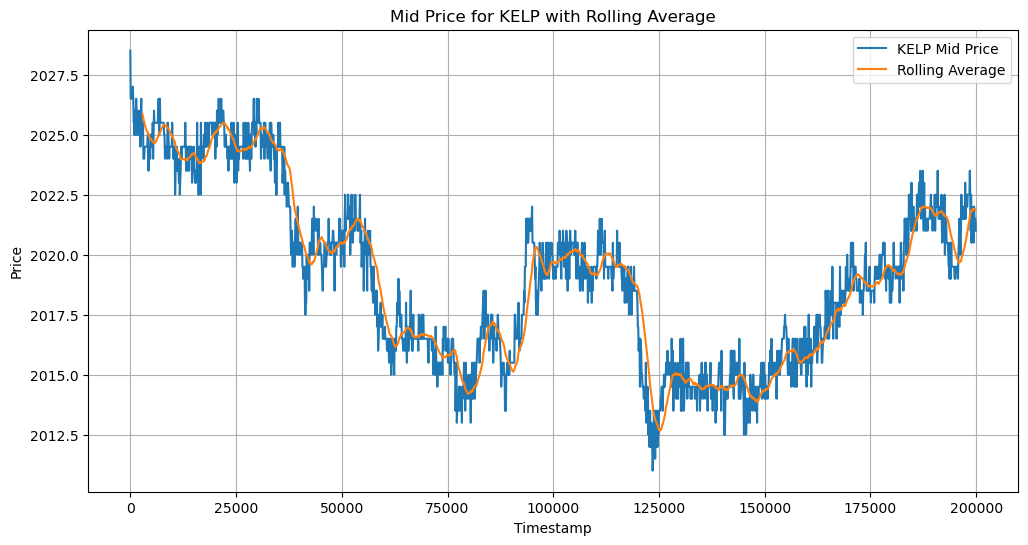

In [ ]:
# Calculate the rolling average (change window size as needed)
df_kelp['rolling_mid_price'] = df_kelp['mid_price'].rolling(window=30).mean()

# Plot the original mid price and the rolling average
plt.figure(figsize=(12, 6))
plt.plot(df_kelp['timestamp'], df_kelp['mid_price'], label='KELP Mid Price')
plt.plot(df_kelp['timestamp'], df_kelp['rolling_mid_price'], label='Rolling Average', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Mid Price for KELP with Rolling Average')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def compute_rsi(series, period):
    delta = np.diff(series)
    delta = np.concatenate(([0], delta))
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    avg_gain = pd.Series(gain).rolling(period, min_periods=period).mean()
    avg_loss = pd.Series(loss).rolling(period, min_periods=period).mean()
    rs = avg_gain / (avg_loss + 1e-10)
    rsi = 100 - (100 / (1 + rs))
    return rsi.fillna(50).values

In [ ]:
import time
import pandas as pd
import numpy as np
from backtesting import Backtest, Strategy
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'backtesting'

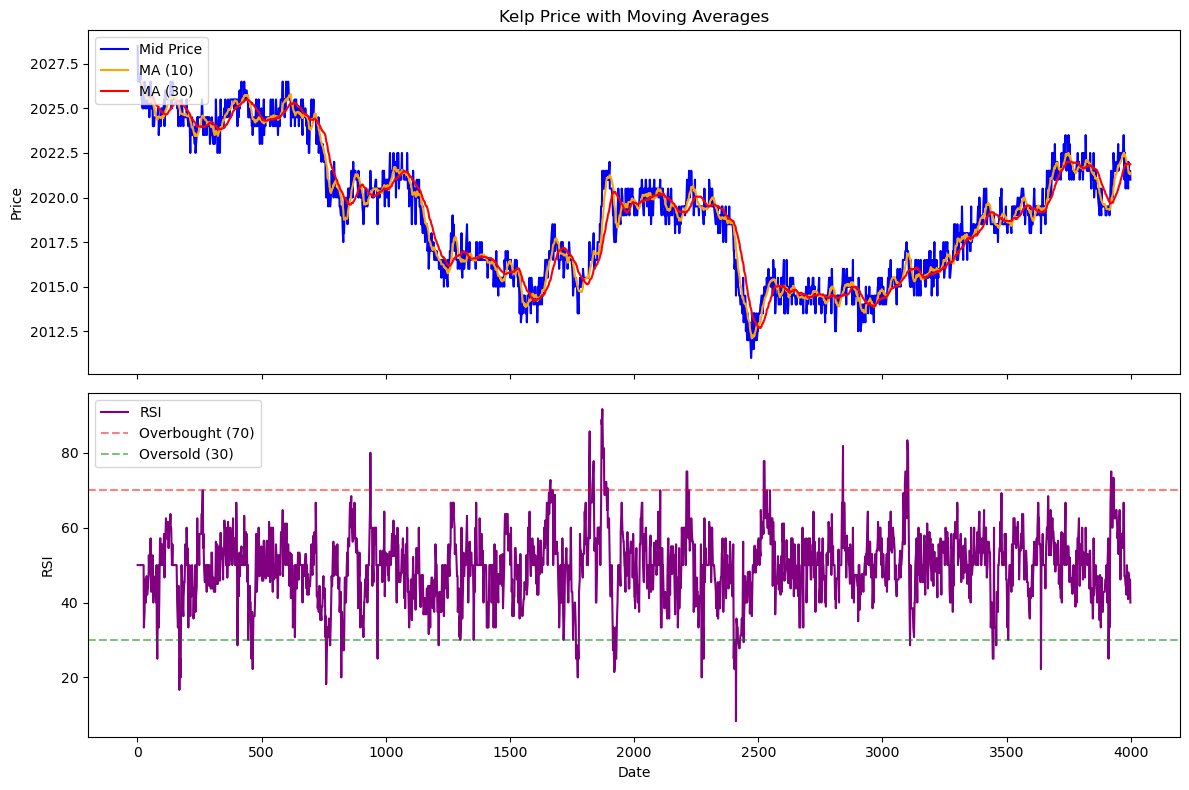

In [ ]:
import matplotlib.pyplot as plt

# --- Create moving averages (fast and slow) using mid_price ---
df_kelp['MA_fast'] = df_kelp['mid_price'].rolling(window=10).mean()
df_kelp['MA_slow'] = df_kelp['mid_price'].rolling(window=30).mean()

# --- Compute RSI (using mid_price instead of Close, period=14) ---
df_kelp['RSI'] = compute_rsi(df_kelp['mid_price'].values, 14)

# --- Plotting ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Top subplot: mid_price and moving averages
ax1.plot(df_kelp.index, df_kelp['mid_price'], label='Mid Price', color='blue')
ax1.plot(df_kelp.index, df_kelp['MA_fast'], label='MA (10)', color='orange')
ax1.plot(df_kelp.index, df_kelp['MA_slow'], label='MA (30)', color='red')
ax1.set_ylabel('Price')
ax1.set_title('Kelp Price with Moving Averages')
ax1.legend(loc='upper left')

# Bottom subplot: RSI
ax2.plot(df_kelp.index, df_kelp['RSI'], label='RSI', color='purple')
ax2.axhline(70, color='red', linestyle='--', alpha=0.5, label='Overbought (70)')
ax2.axhline(30, color='green', linestyle='--', alpha=0.5, label='Oversold (30)')
ax2.set_ylabel('RSI')
ax2.set_xlabel('Date')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

## $\beta$ for prev year


vwap = (best_bid * bid_volume + best_ask * ask_volume) / (bid_volume + ask_volume)

In [ ]:
import pandas as pd

# Example function to compute mmmid_price for a single row
def calc_mmmid_price(row, adverse_volume=15):
    # Build dictionaries for ask and bid orders
    sell_orders = {
        row['ask_price_1']: row['ask_volume_1'],
        row['ask_price_2']: row['ask_volume_2'],
        row['ask_price_3']: row['ask_volume_3']
    }
    buy_orders = {
        row['bid_price_1']: row['bid_volume_1'],
        row['bid_price_2']: row['bid_volume_2'],
        row['bid_price_3']: row['bid_volume_3']
    }
    
    # Check if both dictionaries have orders
    if sell_orders and buy_orders:
        best_ask = min(sell_orders.keys())
        best_bid = max(buy_orders.keys())
        
        # Filter orders based on adverse_volume
        filtered_ask = [price for price in sell_orders.keys() if abs(sell_orders[price]) >= adverse_volume]
        filtered_bid = [price for price in buy_orders.keys() if abs(buy_orders[price]) >= adverse_volume]
        
        mm_ask = min(filtered_ask) if filtered_ask else None
        mm_bid = max(filtered_bid) if filtered_bid else None
        
        if mm_ask is None or mm_bid is None:
            mmmid_price = (best_ask + best_bid) / 2
        else:
            mmmid_price = (mm_ask + mm_bid) / 2
        return mmmid_price
    return None

# Assuming df_kelp is your DataFrame, calculate mmmid_price for each row.
df_star['mmmid_price_calc'] = df_star.apply(calc_mmmid_price, axis=1)

# To get the calculated mmmid_price for the first row (index 0):
# mmmid_price_first_row = df_kelp.iloc[0][ 'mmmid_price_calc']
# print("mmmid_price for the first row:", mmmid_price_first_row)

/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_81496/2959158208.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_star['mmmid_price_calc'] = df_star.apply(calc_mmmid_price, axis=1)


In [8]:
df_star

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,mmmid_price_calc
1,-2,0,STARFRUIT,5002,1,4997.0,31.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5002.5,0.0,5000.0
3,-2,100,STARFRUIT,4997,24,NaN,NaN,NaN,NaN,5003,2,5004.0,22.0,NaN,NaN,5000.0,0.0,5000.5
4,-2,200,STARFRUIT,4997,2,4996.0,20.0,NaN,NaN,5003,20,NaN,NaN,NaN,NaN,5000.0,0.0,4999.5
7,-2,300,STARFRUIT,4996,31,NaN,NaN,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,4999.5,0.0,4999.5
9,-2,400,STARFRUIT,4995,27,NaN,NaN,NaN,NaN,5002,27,NaN,NaN,NaN,NaN,4998.5,0.0,4998.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,-2,199500,STARFRUIT,4949,23,NaN,NaN,NaN,NaN,4956,23,NaN,NaN,NaN,NaN,4952.5,0.0,4952.5
3993,-2,199600,STARFRUIT,4949,22,NaN,NaN,NaN,NaN,4956,22,NaN,NaN,NaN,NaN,4952.5,0.0,4952.5
3994,-2,199700,STARFRUIT,4949,27,NaN,NaN,NaN,NaN,4956,27,NaN,NaN,NaN,NaN,4952.5,0.0,4952.5
3996,-2,199800,STARFRUIT,4949,21,NaN,NaN,NaN,NaN,4956,21,NaN,NaN,NaN,NaN,4952.5,0.0,4952.5


/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_81496/2625243702.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_star['last_return'] = df_star['mmmid_price_calc'].pct_change()
/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_81496/2625243702.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_star['realized_return'] = df_star['mmmid_price_calc'].pct_change().shift(-1)


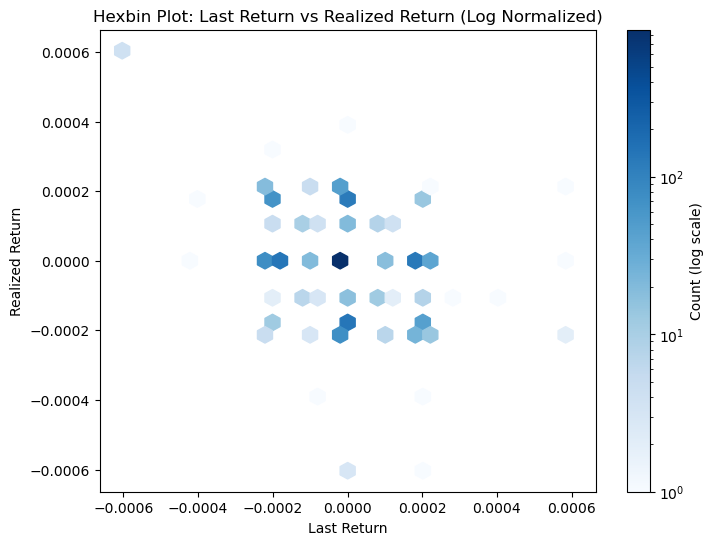

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_kelp already contains the 'mmmid_price_calc' column computed earlier.
# Compute the returns:
df_star['last_return'] = df_star['mmmid_price_calc'].pct_change()
df_star['realized_return'] = df_star['mmmid_price_calc'].pct_change().shift(-1)

# Drop rows with NaN values
df_clean = df_star.dropna(subset=['last_return', 'realized_return'])

# Extract the variables for plotting
X = df_clean['last_return']
Y = df_clean['realized_return']

# Create a scatter plot
import matplotlib.colors as colors

plt.figure(figsize=(8, 6))
plt.hexbin(df_clean['last_return'], df_clean['realized_return'], gridsize=30, cmap='Blues',
           norm=colors.LogNorm(), mincnt=1)
plt.colorbar(label='Count (log scale)')
plt.xlabel('Last Return')
plt.ylabel('Realized Return')
plt.title('Hexbin Plot: Last Return vs Rexalized Return (Log Normalized)')
plt.show()

/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_81496/2060790037.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_star['last_return'] = df_star['mmmid_price_calc'].pct_change()
/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_81496/2060790037.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_star['realized_return'] = df_star['mmmid_price_calc'].pct_change().shift(-1)


                            OLS Regression Results                            
Dep. Variable:        realized_return   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     165.8
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           1.70e-36
Time:                        16:54:50   Log-Likelihood:                 15286.
No. Observations:                1998   AIC:                        -3.057e+04
Df Residuals:                    1996   BIC:                        -3.056e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.091e-06   2.58e-06     -2.363      

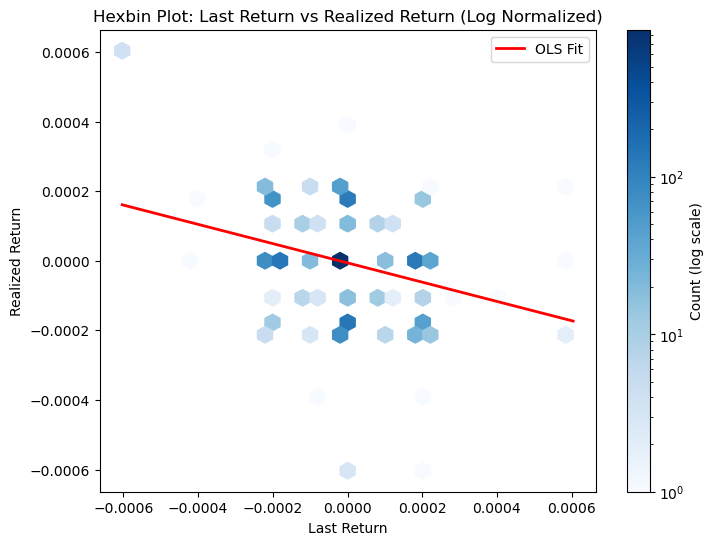

In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Compute returns
df_star['last_return'] = df_star['mmmid_price_calc'].pct_change()
df_star['realized_return'] = df_star['mmmid_price_calc'].pct_change().shift(-1)

# Drop rows with NaN values
df_clean = df_star.dropna(subset=['last_return', 'realized_return'])

# Create the hexbin plot
plt.figure(figsize=(8, 6))
hb = plt.hexbin(df_clean['last_return'], df_clean['realized_return'], gridsize=30, cmap='Blues',
                norm=colors.LogNorm(), mincnt=1)
plt.colorbar(label='Count (log scale)')
plt.xlabel('Last Return')
plt.ylabel('Realized Return')
plt.title('Hexbin Plot: Last Return vs Realized Return (Log Normalized)')

# Set up the independent variable (X) and dependent variable (Y) for OLS
X = df_clean['last_return']
Y = df_clean['realized_return']
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(Y, X).fit()
print(model.summary())

# Extract regression coefficients
intercept, slope = model.params

# Create a sequence of x-values spanning the data range
x_vals = np.linspace(df_clean['last_return'].min(), df_clean['last_return'].max(), 100)
# Compute the corresponding y-values from the OLS model
y_vals = intercept + slope * x_vals

# Plot the regression line on top of the hexbin plot
plt.plot(x_vals, y_vals, color='red', linewidth=2, label='OLS Fit')
plt.legend()
plt.show()